# Week6-机器学习-聚类-KMeans实战
- sklearn 中文社区： https://scikit-learn.org.cn/
- KMeans聚类：https://scikit-learn.org.cn/view/383.html
- 英文官网：https://scikit-learn.org/stable/

## 案例描述
一个黑暗的小屋里，一个黑箱子中有一堆水果，但看不到有什么，那怎么能知道有几种水果，哪几个水果是同一种呢？
1. 对于人类我们可以伸手去摸，通过水果的大小、形状，来猜测不同的水果类别，并根据经验，说明水果的名称。
2. 对于机器学习算法而言，只要知道每一个水果的大小、形状的数据，就可以归纳出一些规律，即可把同一类水果挑出来。

## 实训目标
- 了解聚类要做什么
- 学会使用Kmeans构建模型
- 学会聚类的评价指标

### K-Means的算法如下：
    1. 随机选取K个簇中心点。
    2. 分簇：将每个点，计算该点到K个中心的距离，将其分配到最近的簇，形成K个簇。 
    3. 计算新的簇中心：对于上一步聚类的结果，进行平均计算，得出该簇的新的聚类中心。 
    4. 重复上述两步/直到迭代结束：簇中心（质心）不再发生变化。

## 实训步骤
1. 加载数据集
2. 数据预处理
3. 构建模型
4. 评价模型

In [3]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. 数据加载

In [8]:
# ./data/testSet.txt'
data = pd.read_csv("./data/testSet.txt", names=['x1', 'x2'], header=None, sep='\t')
data.head()

,x1,x2
0,1.658985,4.285136
1,-3.453687,3.424321
2,4.838138,-1.151539
3,-5.379713,-3.362104
4,0.972564,2.924086


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      80 non-null     float64
 1   x2      80 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


In [10]:
data.describe()

,x1,x2
count,80.000000,80.000000
mean,-0.103613,0.054301
std,3.037579,3.053647
min,-5.379713,-4.232586
25%,-2.836842,-3.012599
50%,0.029122,0.152819
75%,2.635250,2.940614
max,4.838138,5.190400


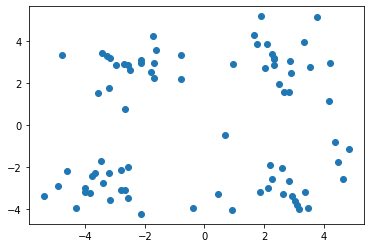

In [16]:
# 原始数据可视化
plt.figure(figsize=(6,4))
plt.scatter(data['x1'], data['x2'])
plt.show()

### 2. 数据预处理（此案例中数据没有缺失值，且不用标准化，可略）
### 3. 构建KMeans模型 
- KMeans聚类：https://scikit-learn.org.cn/view/383.html

In [29]:
# 加载KMeans
from sklearn.cluster import KMeans

# （1）初始化聚类器，指定分簇的数量K=3
km3 = KMeans(n_clusters=3) # 必须手动设置

# （2）训练数据
km3.fit(data) # 无监督学习只需要传入x

# （3）得到簇中心向量
print('计算得到的3个簇的中心分别是：\n', km3.cluster_centers_)
print('共计迭代次数:', km3.n_iter_)
print('样本到其最近的聚类中心的平方距离之和:', km3.inertia_) # 表示簇内样本凝聚程度, 值越小, 凝聚力越高

# （4）每个样本所属的类
label3 = km3.labels_
print('每个样本所属的簇：\n', label3)

计算得到的3个簇的中心分别是：
 [[ 2.8692781  -2.54779119]
 [-0.02298687  2.99472915]
 [-3.38237045 -2.9473363 ]]
共计迭代次数: 3
样本到其最近的聚类中心的平方距离之和: 405.13810196190354
每个样本所属的簇：
 [1 1 0 2 1 1 0 2 1 1 0 2 1 1 0 2 1 1 0 2 1 1 0 2 1 1 0 2 1 1 0 2 1 1 0 2 1
 1 0 2 1 1 0 2 1 1 0 2 1 1 0 2 1 1 0 2 1 1 0 2 1 1 0 2 1 1 0 2 1 1 0 2 0 1
 0 2 1 1 0 2]


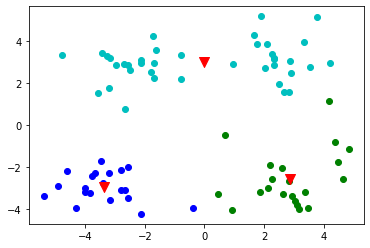

In [28]:
# 将二维数据点画图显示出来
plt.figure(figsize=(6,4))
plt.scatter(data['x1'][label3==0], data['x2'][label3==0], color='b')
plt.scatter(data['x1'][label3==1], data['x2'][label3==1], color='g')
plt.scatter(data['x1'][label3==2], data['x2'][label3==2], color='c')
plt.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], color='r', marker='v', s=100)
plt.show()

### 试试K= 4

In [44]:
km4 = KMeans(n_clusters=4)
km4.fit(data)
print('计算得到的4个簇的中心分别是：\n', km4.cluster_centers_)
print('共计迭代次数:', km4.n_iter_)


label4 = km4.labels_
print('\n每个样本所属的簇：\n', label4)

计算得到的4个簇的中心分别是：
 [[-3.38237045 -2.9473363 ]
 [ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]]
共计迭代次数: 3

每个样本所属的簇：
 [3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3
 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2 1 0 3 2
 1 0 3 2 1 0]


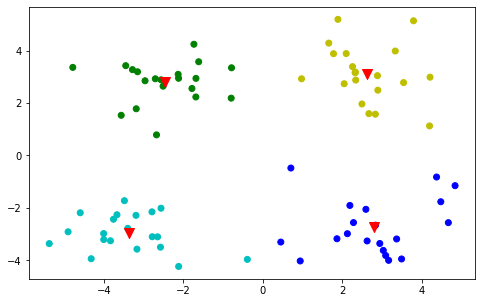

In [48]:
# 将二维数据点画图显示出来 简写法
color_list = np.array(['c','b','g','y'])
plt.figure(figsize=(8,5))
plt.scatter(data['x1'], data['x2'], color=color_list[label4]) # 通过label来取颜色
plt.scatter(km4.cluster_centers_[:, 0], km4.cluster_centers_[:, 1], color='r', marker='v', s=100)

# 4. 模型评价及选择

### 聚类评估常用指标

**1.轮廓系数（Silhouette Coefficient ）**
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
- si接近1，则说明样本i聚类合理
- si接近-1，则说明样本i更应该分类到另外的簇
- 若si 近似为0，则说明样本i在两个簇的边界上。

**2.簇内平方和 WCSS （Within Clustering Sum Squarts）**
- KMeans.inertia_
- 缺点：这个评价参数表示的是簇中某一个点到聚类中心的平方距离之和，这种方法虽然在评估参数最小时表现了聚类的精细性，但是这种情况会出现划分过于精细的状况，并且未考虑和簇外点的距离最大化，因此，更推荐使用轮廓系数，可搭配使用。

In [49]:
# 轮廓系数：silhouette_score 约接近1越好
from sklearn.metrics import silhouette_score # 轮廓系数
print('k=3, 轮廓系数= ', silhouette_score(data, label3))
print('k=4, 轮廓系数= ', silhouette_score(data, label4))
# 结论: k=4优于k=3

k=3, 轮廓系数=  0.5412898780057389
k=4, 轮廓系数=  0.6558213071798628


In [51]:
# 样本到聚类中心的平方距离之和 # 越小越好
print("K=3时, 簇内平方和= {}\nK=4时，簇内平方和= {}".format(km3.inertia_, km4.inertia_))

K=3时, 簇内平方和= 405.13810196190354
K=4时，簇内平方和= 149.95430467642635


### 通过以上指标，很容易得出4个分簇，优于3个分簇。那么4个就是最优解了吗？
- 尝试K=2,3,4,...,10试试看，找到效果最好的方案

In [53]:
sc = [] # 轮廓系数
wcss = [] # 簇内距离平方和

for i in np.arange(2, 11):
    km = KMeans(n_clusters=i)
    km.fit(data)
    sc.append(silhouette_score(data, km.labels_))
    wcss.append(km.inertia_)
print('轮廓系数结果: ', sc)
print('簇内平方和分别是：', wcss)

轮廓系数结果:  [0.4573186176810804, 0.5412898780057389, 0.6558213071798628, 0.6098979828032716, 0.6025509668684299, 0.5330917994449569, 0.44985582679291747, 0.46300247502545455, 0.3612489698639795]
簇内平方和分别是： [792.9168565373269, 405.13810196190354, 149.95430467642635, 123.99203711409866, 108.29261715351157, 93.79300348386928, 79.70761684310011, 74.62102803542169, 62.669904595334465]


Text(0, 0.5, 'Within Clustering Sum Squarts')

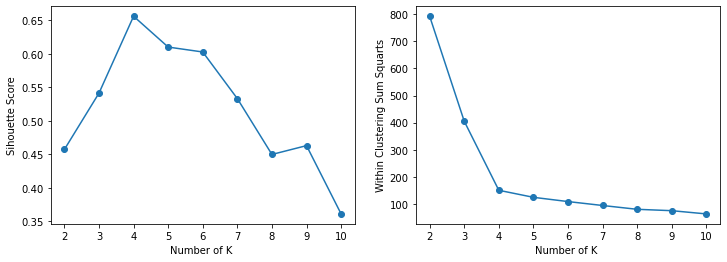

In [62]:
# 轮廓系数和簇内平方和的可视化
plt.figure(figsize=(12, 4))

x = np.arange(2,11)

plt.subplot(1, 2, 1)
plt.plot(x, sc, marker='o')
plt.xlabel("Number of K ")
plt.ylabel("Sihouette Score")


plt.subplot(1, 2, 2)
plt.plot(x, wcss, marker='o')


plt.xlabel("Number of K ")
plt.ylabel("Within Clustering Sum Squarts")

Text(0, 0.5, 'Within Clustering Sum Squarts')

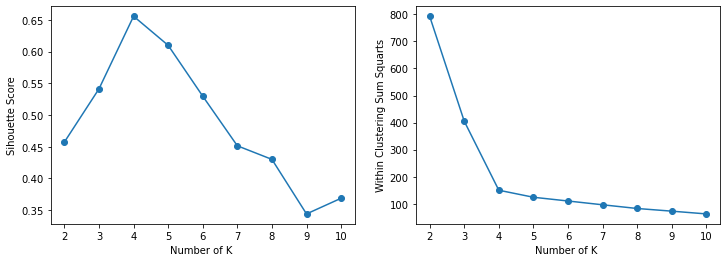

In [15]:
# 轮廓系数和簇内平方和的可视化
plt.figuer(figsize=(8, 4))

x = np.arange(2,11)

plt.subplot(1, 2, 1)
plt.plot(x, sc)

plt.xlabel("Number of K ")
plt.ylabel("Sihouette Score")


plt.xlabel("Number of K ")
plt.ylabel("Within Clustering Sum Squarts")

### 根据拐点选定K为最佳类别数，此案例中K=4
---